In [ ]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("UniversalBank.csv")
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5000 non-null   int64  
 1   Age                5000 non-null   int64  
 2   Experience         5000 non-null   int64  
 3   Income             5000 non-null   int64  
 4   ZIP Code           5000 non-null   int64  
 5   Family             5000 non-null   int64  
 6   CCAvg              5000 non-null   float64
 7   Education          5000 non-null   int64  
 8   Mortgage           5000 non-null   int64  
 9   PersonalLoan       5000 non-null   int64  
 10  SecuritiesAccount  5000 non-null   int64  
 11  CDAccount          5000 non-null   int64  
 12  Online             5000 non-null   int64  
 13  CreditCard         5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
#checking for duplicated
df.duplicated().sum()

0

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df.CreditCard = label_encoder.fit_transform(df.CreditCard)
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
Y1 = df.CreditCard
X1 = df.drop('CreditCard', axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1,Y1, test_size=0.2, random_state=42)

In [ ]:
from sklearn import svm
clf = svm.polySVC()
clf.fit(X_train, y_train)

AttributeError: ignored

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

svm_train_pred = clf.predict(X_train)
svm_a_train = metrics.accuracy_score(y_train, svm_train_pred)

svm_test_pred = clf.predict(X_test)
svm_a_test = metrics.accuracy_score(y_test, svm_test_pred)

print('svm = train accuracy = %.4f'% svm_a_train)
print('svm = test accuracy = %.4f'% svm_a_test)

svm = train accuracy = 0.7055
svm = test accuracy = 0.7080


In [ ]:
# confusion matrix for train set
svm_c_train = confusion_matrix(y_train, svm_train_pred)

#confusion matrix for tests et
svm_c_test = confusion_matrix(y_test, svm_test_pred)

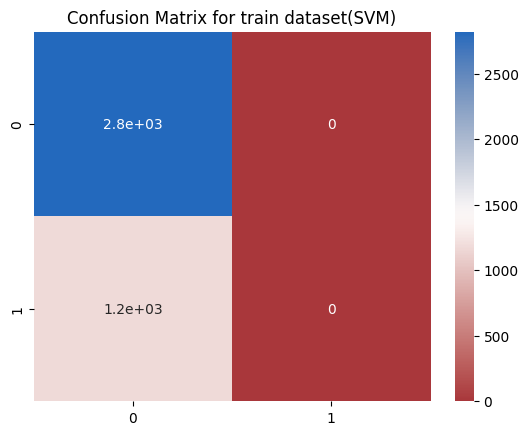

In [ ]:
sns.heatmap(svm_c_train, annot=True, cmap="vlag_r")
plt.title("Confusion Matrix for train dataset(SVM)");

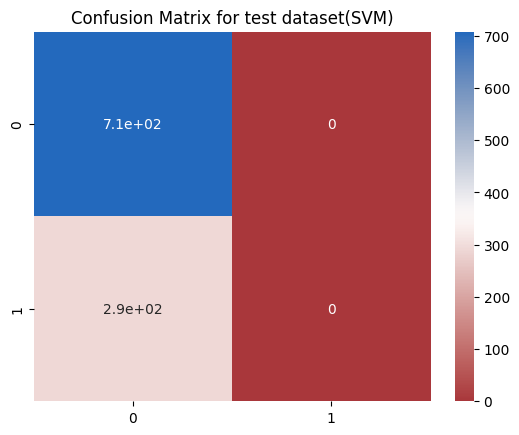

In [ ]:
sns.heatmap(svm_c_test, annot=True, cmap="vlag_r")
plt.title("Confusion Matrix for test dataset(SVM)");

In [ ]:
svm_report = classification_report(y_test,svm_test_pred)
print(svm_report)

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       708
           1       0.00      0.00      0.00       292

    accuracy                           0.71      1000
   macro avg       0.35      0.50      0.41      1000
weighted avg       0.50      0.71      0.59      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#tuned model
from sklearn.model_selection import GridSearchCV
from sklearn import svm

clf = svm.SVC()

grid = [
        {'C' : np.logspace(-4, 2, 20),
         'kernel' : ['sigmoid','linear', 'rbf']
         }
        ]

clf = GridSearchCV(clf, param_grid = grid,cv = 3)
best_clf = clf.fit(X_train, y_train)

print(best_clf.best_estimator_)
print('train score: ',best_clf.score(X_train,y_train))
print('test score: ',best_clf.score(X_test,y_test))

SVC(C=0.0001, kernel='linear')
train score:  0.70575
test score:  0.708


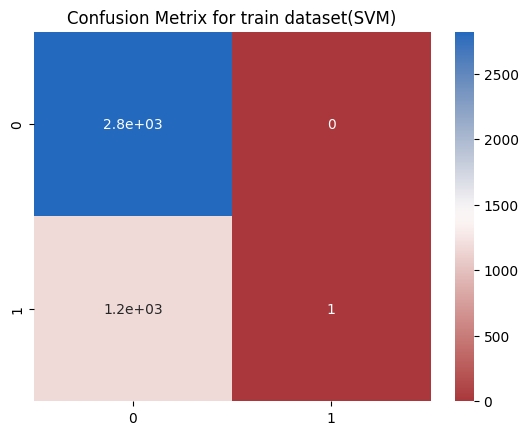

In [ ]:
#confusion matrix for train set

svm_train_pred = best_clf.predict(X_train)
svm_a_train = metrics.accuracy_score(y_train, svm_train_pred)
svm_c_train = confusion_matrix(y_train, svm_train_pred)

sns.heatmap(svm_c_train, annot=True, cmap="vlag_r")
plt.title("Confusion Metrix for train dataset(SVM)");

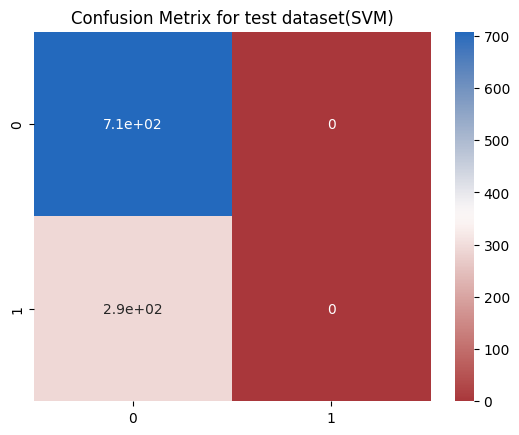

In [ ]:
#confusion  matrix for test set

svm_test_pred = best_clf.predict(X_test)
svm_a_test = metrics.accuracy_score(y_test, svm_test_pred)
svm_c_test = confusion_matrix(y_test, svm_test_pred)

sns.heatmap(svm_c_test, annot=True, cmap="vlag_r")
plt.title("Confusion Metrix for test dataset(SVM)");

In [ ]:
svm_report = classification_report(y_test,svm_test_pred)
print(svm_report)

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       708
           1       0.00      0.00      0.00       292

    accuracy                           0.71      1000
   macro avg       0.35      0.50      0.41      1000
weighted avg       0.50      0.71      0.59      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
